In [1]:
import pyodbc
import pandas as pd
import joblib

# Set your credentials here
server = 'DESKTOP-6NBPH33'  # or your instance name
database = 'DW_Finance'  # or the actual DB name
username = 'rana'  # if using SQL Server Authentication
password = 'rana'

# Use this if you're using SQL Server Authentication
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    f'SERVER={server};'
    f'DATABASE={database};'
    f'UID={username};'
    f'PWD={password}'
)

conn = pyodbc.connect(conn_str)

# Test query


In [2]:
query = """
SELECT 
    f.Price,
    f.Amount,
    f.DiscountOffered,
    f.RecommendedProfitMargin,
    f.Fk_Supplier,
    d.Name AS SupplierName
FROM Fact_Purchase f
JOIN Dim_Supplier d
    ON f.Fk_Supplier = d.Pk_Supplier
"""
df = pd.read_sql(query, conn)


C:\Users\MSI\AppData\Local\Temp\ipykernel_6580\4204568695.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [3]:
df_grouped = df.groupby('SupplierName').agg({
    'DiscountOffered': 'mean',
    'RecommendedProfitMargin': 'mean',
    'Amount': 'mean',
    'Price': 'mean'
}).reset_index()


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_grouped.drop('SupplierName', axis=1))


In [5]:
    from sklearn.cluster import KMeans

    kmeans = KMeans(n_clusters=3, random_state=42)
    df_grouped['Cluster'] = kmeans.fit_predict(scaled_data)


In [6]:
print(df_grouped.head())


  SupplierName  DiscountOffered  RecommendedProfitMargin     Amount  Price  \
0     AB InBev       264.572000                    45.00  3729.1320   6.50   
1     Al Awael       219.642500                    45.00  2948.9825   1.90   
2       Auchan       212.452500                    44.86  2712.6700  60.94   
3       Badoit       220.368333                    45.00  2017.9800   2.00   
4      Barilla       173.446000                    45.00  2724.4720   4.50   

   Cluster  
0        0  
1        0  
2        0  
3        2  
4        0  


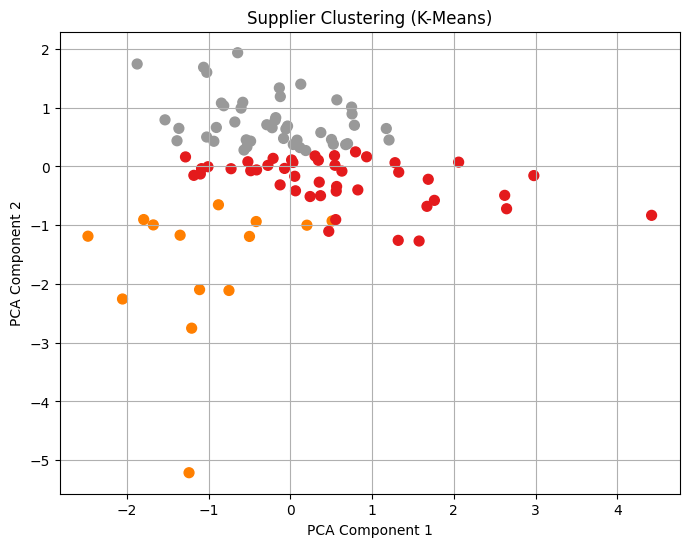

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=df_grouped['Cluster'], cmap='Set1', s=50)
plt.title("Supplier Clustering (K-Means)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


In [8]:
# Save your trained model

joblib.dump(kmeans, 'my_model.pkl')


['my_model.pkl']

In [9]:
import os
print(os.getcwd())


c:\Users\MSI\Downloads


In [10]:
import pandas as pd
print(pd.__version__)


2.2.3
